In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HTC
import time
import pickle
from scipy import signal
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Load connectome and normalize it
W=np.loadtxt("../Data/connectivity_matrix/weights.txt")

In [3]:
active_frac=0.1 #Initial fraction of active neurons
n_runs=100 #Parallel runs
tmin=0.00 #Min tc
tmax=0.31 #Max tc
delta_tc=0.01 #Variation of tc
dt=0.1 #Time step
n_timesteps=6000 #Total number of timesteps
s_step=10 #Campute s1 s2 every s_step (to speed up computing time)
compute_s1_s2=True 
compute_s_distrib=True
compute_fc=True
save_rtn=False

In [4]:
# Create brain object and set its parameters
brain=HTC.Brain()
brain.connectome(W, normalize=True)
n_neurons=brain.n_neurons
brain.set_netowrk_parameters(r1=2/n_neurons, r2=(2/n_neurons)**0.2)#, tc=0.15)

output=brain.simulation(active_frac=active_frac, n_runs=n_runs,
                      tmin=tmin, tmax=tmax, delta_tc=delta_tc,
                      dt=dt, n_timesteps=n_timesteps,
                      compute_s1_s2=compute_s1_s2, s_step=s_step,
                      compute_s_distrib=compute_s_distrib, tc_distrib=0.15,
                      compute_fc=compute_fc,
                       save_rtn=save_rtn)

Connectome of shape (66, 66) now loaded and normalized successfully
r1 and r2 parameters now set successfully


In [5]:
# a, sigma a
# s1, s2
# p dist
# chi, rho
# att in tempo
# fc matrix al tc

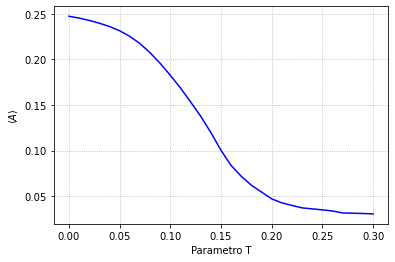

In [46]:
plt.plot(output['tc'], output['activity'], color='b')
plt.xlabel('Parametro T')
plt.ylabel(r'$\langle A\rangle$')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/a.pdf', bbox_inches='tight')
plt.show()

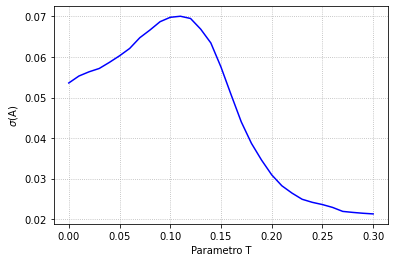

In [32]:
plt.plot(output['tc'], output['sigma_activity'], color='b')
plt.xlabel('Parametro T')
plt.ylabel(r'$\sigma$(A)')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/sa.pdf', bbox_inches='tight')

plt.show()

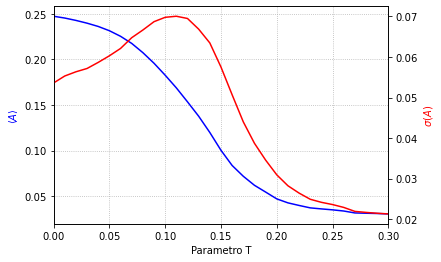

In [33]:
fig, ax1 = plt.subplots()
plt.grid(linestyle='dotted')
plt.xlim(0,0.3)
ax2 = ax1.twinx()
ax1.plot(output['tc'], output['activity'], color='b')
ax2.plot(output['tc'], output['sigma_activity'], color='r')

ax1.set_xlabel('Parametro T')
ax1.set_ylabel(r'$\langle A \rangle$', color='b')
ax2.set_ylabel(r'$\sigma (A)$', color='r')

plt.savefig('../Figure/Simulazione/Norm/a_sa.pdf', bbox_inches='tight')

plt.show()

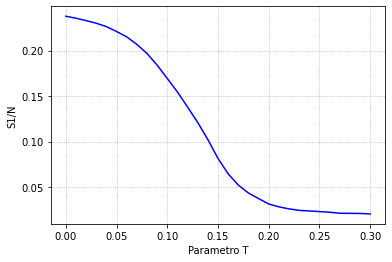

In [34]:
plt.plot(output['tc'], output['s1']/brain.n_neurons, color='b')
plt.xlabel('Parametro T')
plt.ylabel('S1/N')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/s1.pdf', bbox_inches='tight')

plt.show()

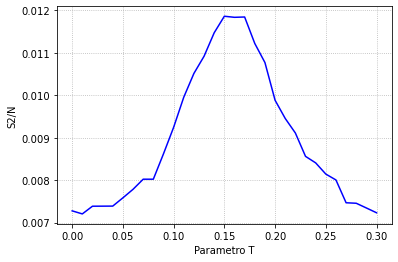

In [35]:
plt.plot(output['tc'], output['s2']/brain.n_neurons, color='b')
plt.xlabel('Parametro T')
plt.ylabel('S2/N')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/s2.pdf', bbox_inches='tight')

plt.show()

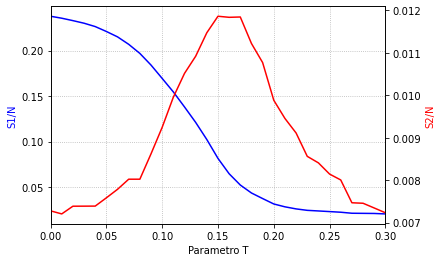

In [36]:
fig, ax1 = plt.subplots()
plt.grid(linestyle='dotted')
plt.xlim(0,0.3)
ax2 = ax1.twinx()
ax1.plot(output['tc'], output['s1']/brain.n_neurons, color='b')
ax2.plot(output['tc'], output['s2']/brain.n_neurons, color='r')

ax1.set_xlabel('Parametro T')
ax1.set_ylabel('S1/N', color='b')
ax2.set_ylabel('S2/N', color='r')

plt.savefig('../Figure/Simulazione/Norm/s1_s2.pdf', bbox_inches='tight')


plt.show()

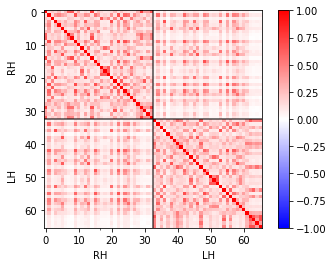

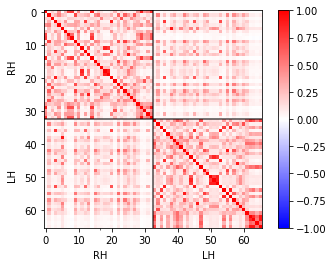

In [37]:
plt.imshow(output['fc'][11], cmap='bwr')
plt.colorbar()
plt.clim(-1,1)
plt.axvline(x=32.5, color='black', alpha=0.7)
plt.axhline(y=32.5, color='black', alpha=0.7)
ax = plt.gca()

ax.yaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.yaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))
ax.xaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))

plt.setp(ax.yaxis.get_minorticklabels(), rotation=90, va="center")
ax.tick_params("y",which="minor",pad=25, left=False)
plt.setp(ax.xaxis.get_minorticklabels(), va="center")
ax.tick_params("x",which="minor",pad=25, left=False)
plt.savefig('../Figure/Simulazione/Norm/fc_011.pdf', bbox_inches='tight')

plt.show()
######################################################
plt.imshow(output['fc'][15], cmap='bwr')
plt.colorbar()
plt.clim(-1,1)
plt.axvline(x=32.5, color='black', alpha=0.7)
plt.axhline(y=32.5, color='black', alpha=0.7)
ax = plt.gca()

ax.yaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.yaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))
ax.xaxis.set_minor_locator(mticker.FixedLocator((66.0/4.0, 66/4.0*3)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("RH", "LH")))

plt.setp(ax.yaxis.get_minorticklabels(), rotation=90, va="center")
ax.tick_params("y",which="minor",pad=25, left=False)
plt.setp(ax.xaxis.get_minorticklabels(), va="center")
ax.tick_params("x",which="minor",pad=25, left=False)
plt.savefig('../Figure/Simulazione/Norm/fc_015.pdf', bbox_inches='tight')


plt.show()

In [38]:
rho,chi=HTC.rho_chi_added_weights([output])

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


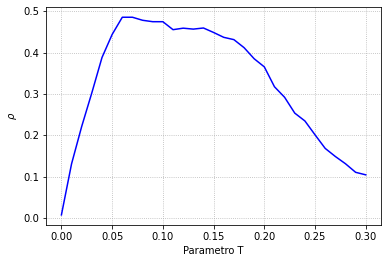

In [39]:
plt.plot(output['tc'], rho[0], color='b')
plt.xlabel('Parametro T')
plt.ylabel(r'$\rho$')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/rho.pdf', bbox_inches='tight')

plt.show()

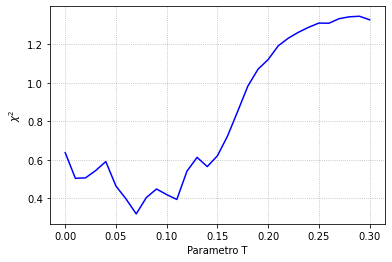

In [40]:
plt.plot(output['tc'], chi[0], color='b')
plt.xlabel('Parametro T')
plt.ylabel(r'$\chi^2$')
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/chi.pdf', bbox_inches='tight')

plt.show()

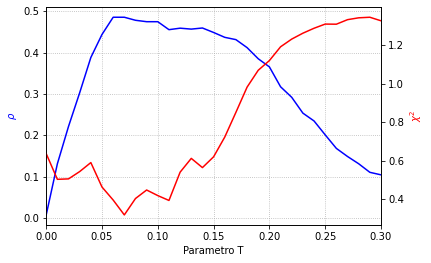

In [45]:
fig, ax1 = plt.subplots()
plt.grid(linestyle='dotted')
plt.xlim(0,0.3)
ax2 = ax1.twinx()
ax1.plot(output['tc'], rho[0], color='b')
ax2.plot(output['tc'], chi[0], color='r')

ax1.set_xlabel('Parametro T')
ax1.set_ylabel(r'$\rho$', color='b')
ax2.set_ylabel(r'$\chi^2$', color='r')
plt.savefig('../Figure/Simulazione/Norm/rho_chi.pdf', bbox_inches='tight')

plt.show()

In [42]:
import matplotlib.ticker
from scipy.optimize import curve_fit

In [43]:
def fitter(x,alpha, gamma):
    return x**(-alpha)*np.exp(-x*gamma)

x,ll=HTC.get_sizes_distribution(output['s_distrib'])

popt,_=curve_fit(fitter, x,ll)
alpha,gamma=3/2,1/66
x_model=np.linspace(x.min(),x.max(), 100)
y_model=fitter(x_model, alpha, gamma)

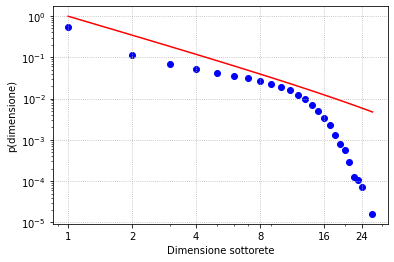

In [44]:
import matplotlib.ticker

#x,ll=HTC.get_sizes_distribution(output['s_distrib'])

fig, ax=plt.subplots()
ax.scatter(x,ll , color='b')
ax.plot(x_model, y_model, color='r')
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel("Dimensione sottorete")
ax.set_ylabel("p(dimensione)")
ax.set_xticks([1,2,4,8,16,24])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Norm/dist_sizes.pdf', bbox_inches='tight')

plt.show()